In [126]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [127]:
!rm ./out/*

In [128]:
cur_dir = %pwd

In [129]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [130]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [131]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [132]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [133]:
df = df.sort_index()

In [134]:
df.describe()

,2023-12-23T10:53:24.424343,2023-12-23T11:03:38.469366,2023-12-23T11:05:26.056371,2023-12-23T11:08:00.812929,2023-12-23T11:10:09.166399,2023-12-23T11:13:22.721985
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,9.740481e+04,1.490381e+05,1.498611e+05,4.842672e+05,4.481520e+05,5.999009e+05
std,4.027713e+05,1.086762e+06,1.087842e+06,2.190026e+06,2.003727e+06,3.329987e+06
min,1.150000e+02,1.150000e+02,2.110000e+02,2.113000e+03,1.583000e+03,1.787000e+03
25%,7.657000e+03,7.675000e+03,7.716500e+03,1.627975e+04,1.412775e+04,1.627975e+04
50%,1.815250e+04,1.865850e+04,1.872600e+04,4.744200e+04,3.908650e+04,4.829400e+04
75%,4.732825e+04,5.028925e+04,5.080325e+04,1.726625e+05,1.533002e+05,1.844292e+05
max,7.374017e+06,2.792288e+07,2.792288e+07,3.393899e+07,2.956732e+07,6.469908e+07


In [135]:
df.iloc[:, -1].mean()

599900.854

<AxesSubplot: >

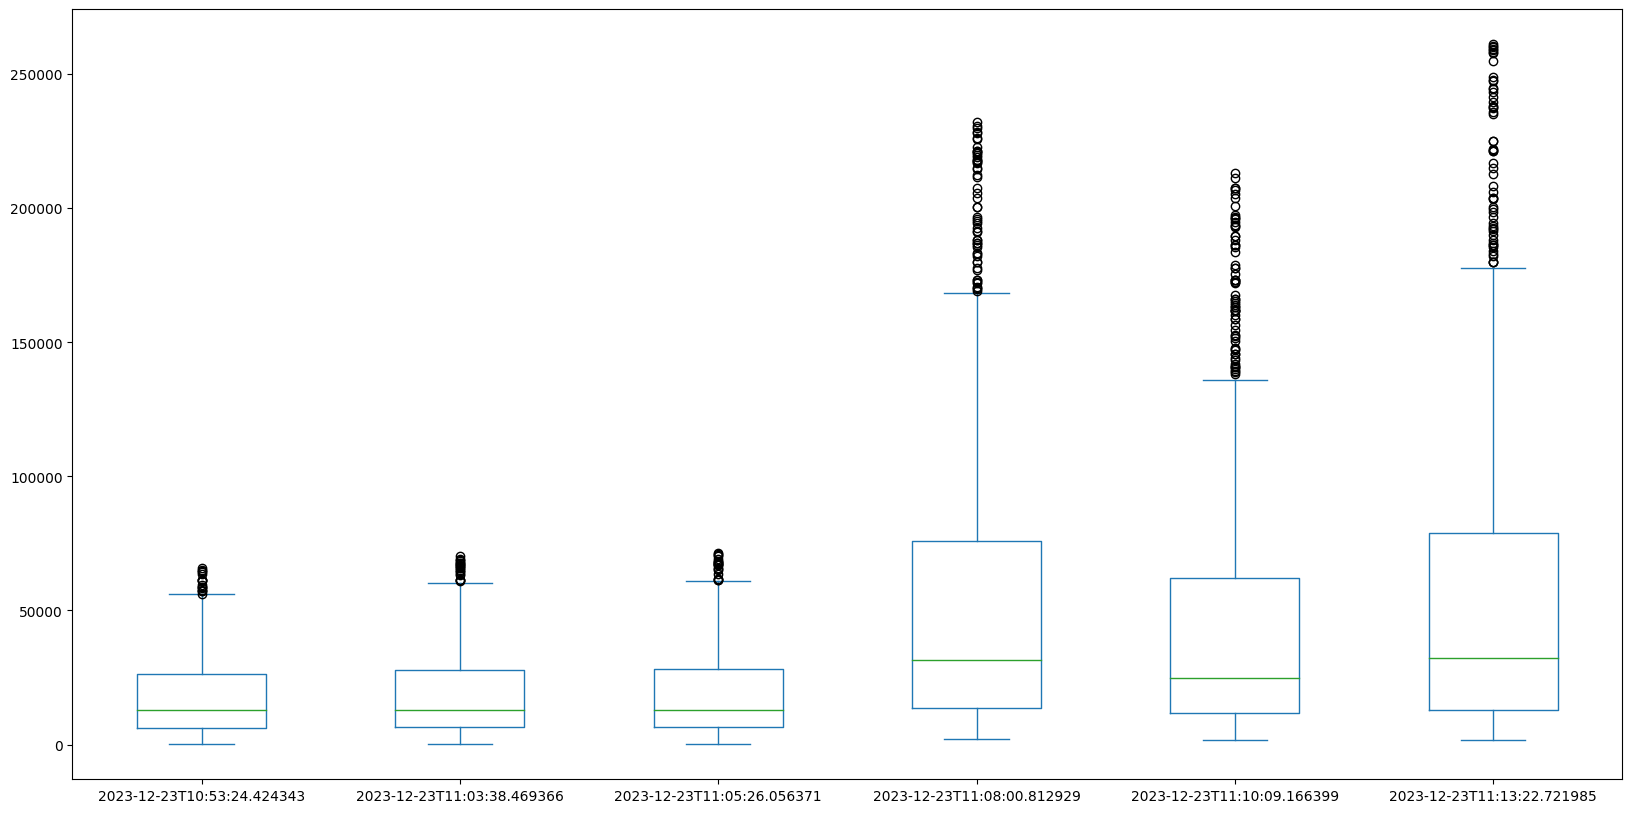

In [136]:
df[df<df.quantile(0.8)].plot(kind='box', figsize=(20, 10))

In [137]:
df.to_csv("test_res.csv")